In [1]:
import pandas as pd
import requests
import io
import urllib3

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

url = "https://breathecode.herokuapp.com/asset/internal-link?id=2546&path=sales.csv"

response = requests.get(url, verify=False)

dataframe = pd.read_csv(io.StringIO(response.text), sep=",")

dataframe.head(2)

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211


In [2]:
dataframe.info

<bound method DataFrame.info of                            date        sales
0    2022-09-03 17:10:08.079328    55.292157
1    2022-09-04 17:10:08.079328    53.803211
2    2022-09-05 17:10:08.079328    58.141693
3    2022-09-06 17:10:08.079328    64.530899
4    2022-09-07 17:10:08.079328    66.013633
..                          ...          ...
361  2023-08-30 17:10:08.079328   989.600354
362  2023-08-31 17:10:08.079328   994.987326
363  2023-09-01 17:10:08.079328   995.814415
364  2023-09-02 17:10:08.079328   997.350214
365  2023-09-03 17:10:08.079328  1000.482785

[366 rows x 2 columns]>

In [3]:
dataframe.shape

(366, 2)

In [5]:
dataframe.describe()

,sales
count,366.000000
mean,524.963968
std,275.089698
min,53.803211
25%,290.186822
50%,520.699468
75%,763.289263
max,1000.482785


Text(0.5, 1.0, 'sales')

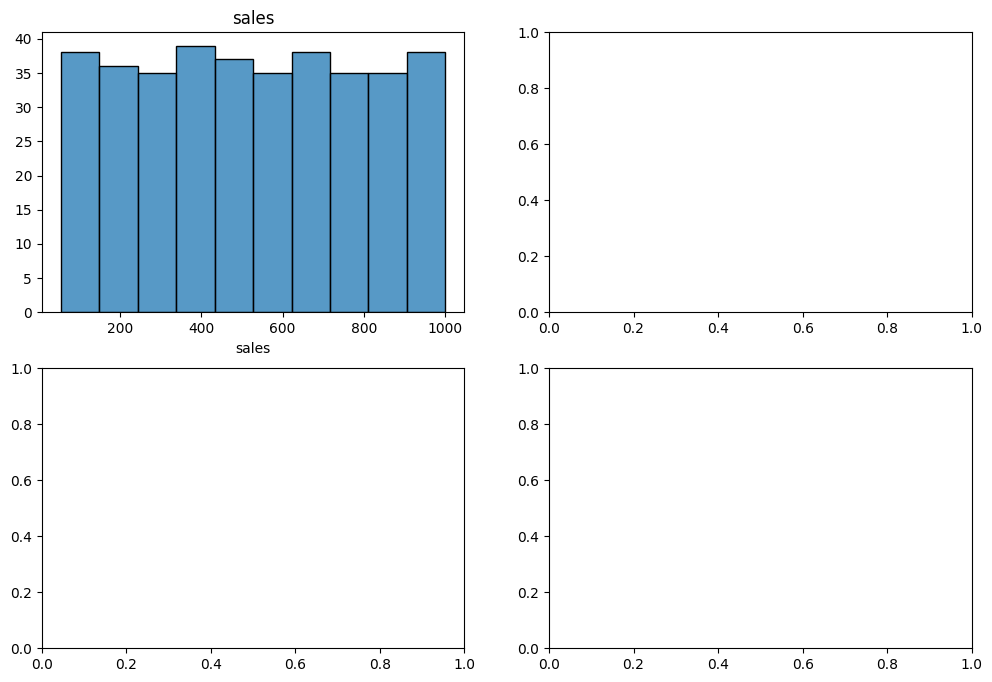

In [6]:
#Analsis de variables numericas
"""
En este caso tenemos las ventas, el costo, el inventario, etc

"""
import matplotlib.pyplot as plt
import seaborn as sns

#Crear histogramas y un diagrama de caja
fig, axis = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(ax=axis[0,0], data=dataframe, x="sales").set(ylabel=None)
axis[0,0].set_title("sales")


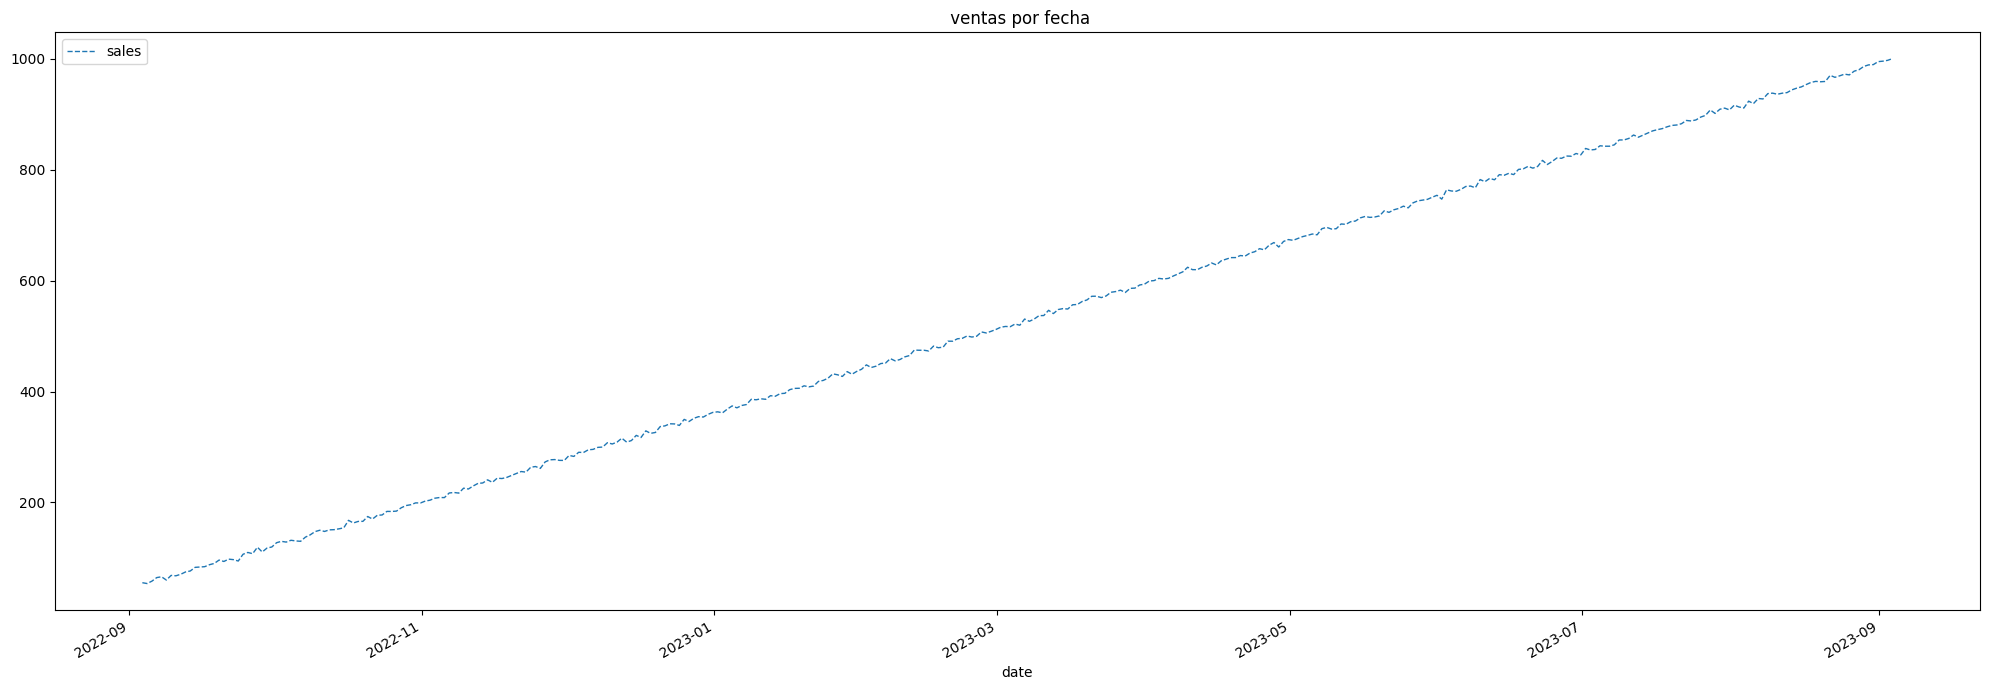

In [ ]:
from xgboost.callback import EarlyStopping
from pathlib import Path
import matplotlib.pyplot as plt
import requests
import io
import urllib3
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit 
from sklearn.metrics import mean_squared_error 

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

url = "https://breathecode.herokuapp.com/asset/internal-link?id=2546&path=sales.csv"

response = requests.get(url, verify=False)

dataframe = pd.read_csv(io.StringIO(response.text), sep=",")

dataframe["date"]=pd.to_datetime(dataframe["date"])
counts= dataframe.groupby("date")["sales"].sum()
pw_clean=pd.DataFrame(counts)
pw_clean["date"]=pd.to_datetime(pw_clean.index)
pw_clean=pw_clean.set_index("date")
pw_clean.plot(style="--",figsize=(20,7), lw=1, title=" ventas por fecha")
plt.tight_layout()
plt.show()


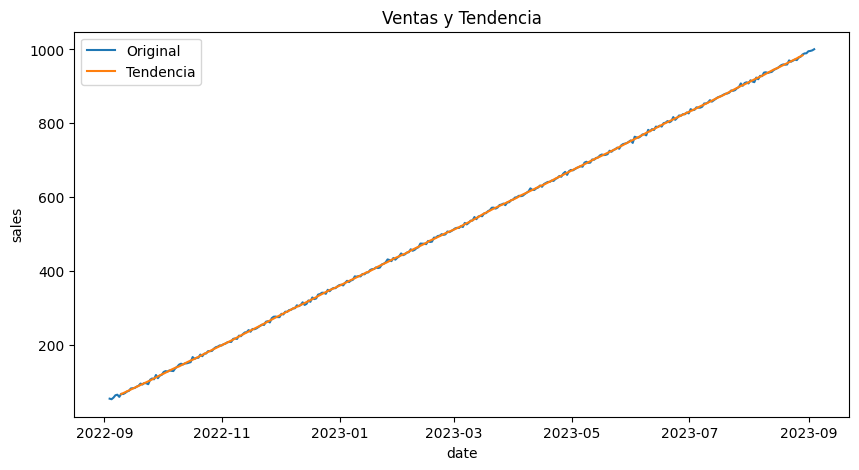

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
import urllib3
import pandas as pd

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

url = "https://breathecode.herokuapp.com/asset/internal-link?id=2546&path=sales.csv"
response = requests.get(url, verify=False)
dataframe = pd.read_csv(io.StringIO(response.text), sep=",")

dataframe["date"] = pd.to_datetime(dataframe["date"])
pw_clean = dataframe.groupby("date")["sales"].sum().to_frame()

decomposition = seasonal_decompose(pw_clean["sales"], period=12)
trend = decomposition.trend

fig, axis = plt.subplots(figsize=(10, 5))
sns.lineplot(data=pw_clean, x=pw_clean.index, y="sales", label="Original")
sns.lineplot(data=trend, label="Tendencia")
plt.title("Ventas y Tendencia")
plt.show()

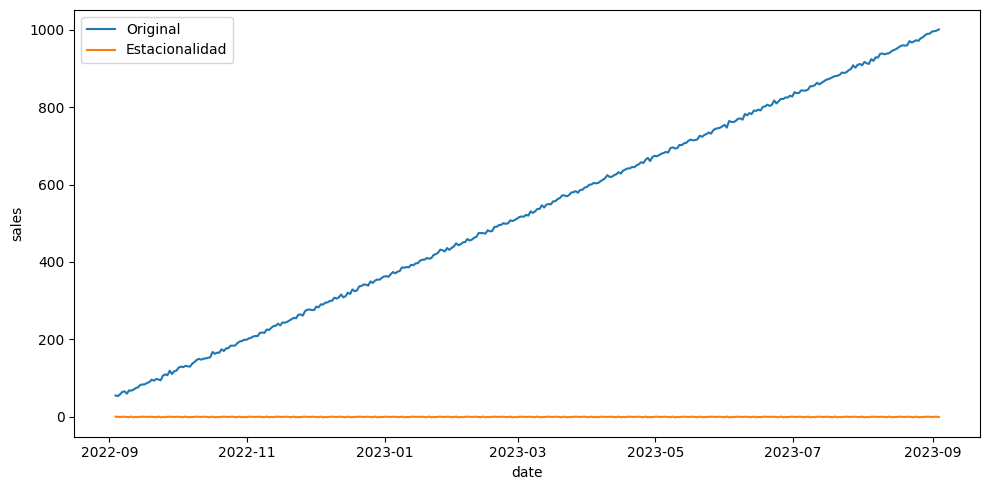

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
import urllib3
import pandas as pd

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

url = "https://breathecode.herokuapp.com/asset/internal-link?id=2546&path=sales.csv"
response = requests.get(url, verify=False)
dataframe = pd.read_csv(io.StringIO(response.text), sep=",")

dataframe["date"] = pd.to_datetime(dataframe["date"])
pw_clean = dataframe.groupby("date")["sales"].sum().to_frame()

decomposition = seasonal_decompose(pw_clean["sales"], period=12)
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize=(10, 5))
sns.lineplot(data=pw_clean, x=pw_clean.index, y="sales", label="Original")
sns.lineplot(data=seasonal, label="Estacionalidad")
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
import requests
import io
import urllib3
from statsmodels.tsa.stattools import adfuller

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

url = "https://breathecode.herokuapp.com/asset/internal-link?id=2546&path=sales.csv"
response = requests.get(url, verify=False)
dataframe = pd.read_csv(io.StringIO(response.text), sep=",")

dataframe["date"] = pd.to_datetime(dataframe["date"])
ts = dataframe.groupby("date")["sales"].sum()

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    return dfoutput

print(test_stationarity(ts))

Resultados de la prueba de Dickey-Fuller:
Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64


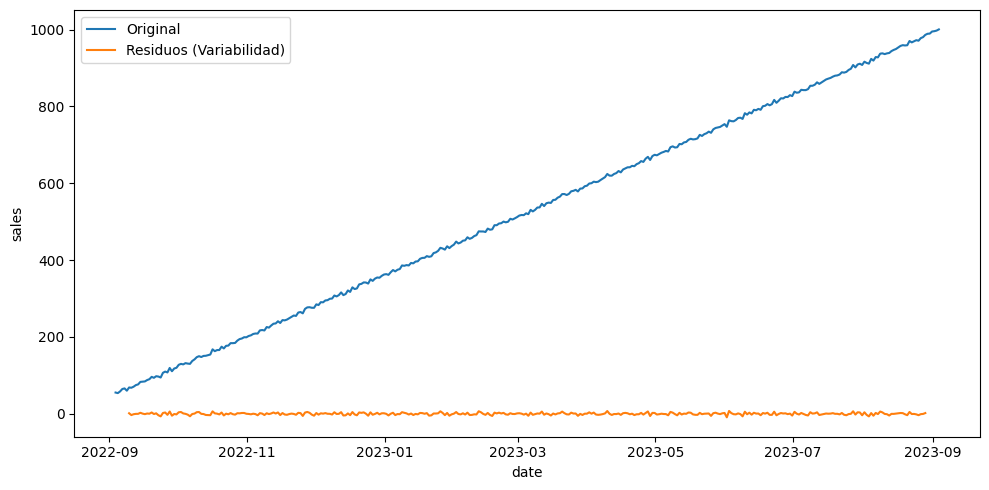

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
import urllib3
import pandas as pd

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

url = "https://breathecode.herokuapp.com/asset/internal-link?id=2546&path=sales.csv"
response = requests.get(url, verify=False)
dataframe = pd.read_csv(io.StringIO(response.text), sep=",")

dataframe["date"] = pd.to_datetime(dataframe["date"])
ts = dataframe.groupby("date")["sales"].sum()

decomposition = seasonal_decompose(ts, period=12)
residual = decomposition.resid

fig, axis = plt.subplots(figsize=(10, 5))
sns.lineplot(data=ts, label="Original")
sns.lineplot(data=residual, label="Residuos (Variabilidad)")
plt.tight_layout()
plt.show()

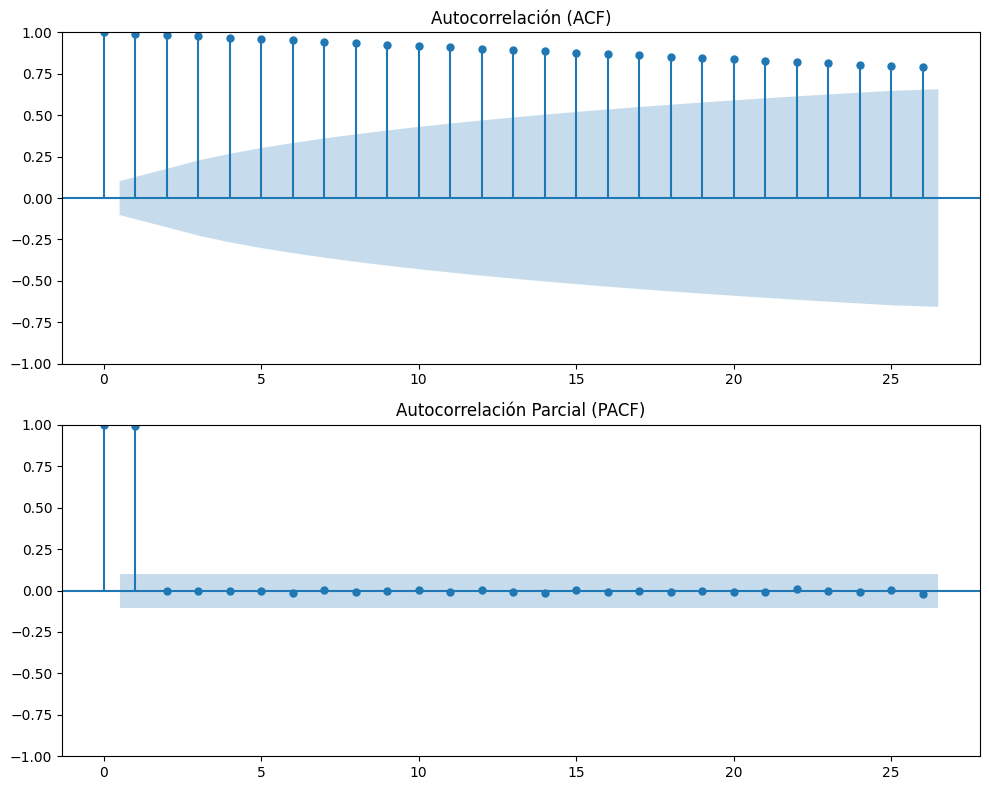

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, axis = plt.subplots(2, 1, figsize=(10, 8))

# Autocorrelación (ACF)
plot_acf(ts, ax=axis[0])
axis[0].set_title("Autocorrelación (ACF)")

# Autocorrelación Parcial (PACF)
plot_pacf(ts, ax=axis[1])
axis[1].set_title("Autocorrelación Parcial (PACF)")

plt.tight_layout()
plt.show()

Entrenando el modelo... por favor espera.


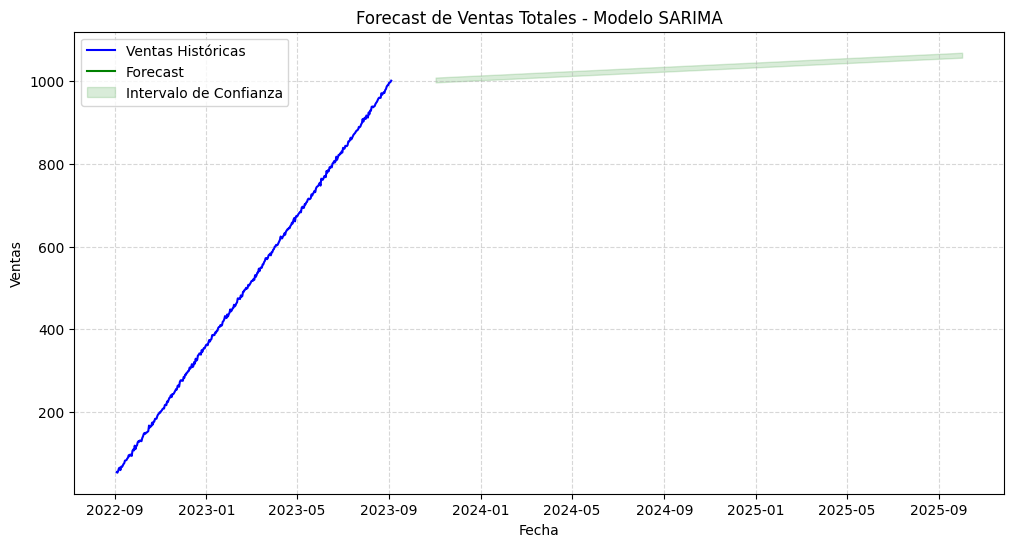


Predicciones para los próximos meses:
2023-11-01 17:10:08.079328   NaN
2023-12-01 17:10:08.079328   NaN
2024-01-01 17:10:08.079328   NaN
2024-02-01 17:10:08.079328   NaN
2024-03-01 17:10:08.079328   NaN
2024-04-01 17:10:08.079328   NaN
2024-05-01 17:10:08.079328   NaN
2024-06-01 17:10:08.079328   NaN
2024-07-01 17:10:08.079328   NaN
2024-08-01 17:10:08.079328   NaN
Freq: MS, dtype: float64


In [10]:
import pandas as pd
import requests
import io
import urllib3
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima

# 1. Configuración y Carga de Datos
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
url = "https://breathecode.herokuapp.com/asset/internal-link?id=2546&path=sales.csv"
response = requests.get(url, verify=False)
dataframe = pd.read_csv(io.StringIO(response.text), sep=",")

# 2. Preparación de la Serie Temporal Original
dataframe["date"] = pd.to_datetime(dataframe["date"])
ts = dataframe.groupby("date")["sales"].sum()

# 3. Entrenamiento del Modelo (usando la serie original 'ts')
# Dejamos que auto_arima encuentre el valor de 'd' (diferenciación) por nosotros
print("Entrenando el modelo... por favor espera.")
model = auto_arima(ts, seasonal=True, m=12, trace=False, suppress_warnings=True)

# 4. Generar Forecast para los próximos mese
n_periods = 24
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Crear un índice de fechas para el futuro
forecast_index = pd.date_range(ts.index[-1], periods=n_periods + 1, freq='MS')[1:]
forecast_series = pd.Series(forecast, index=forecast_index)

# 5. Visualización Profesional
plt.figure(figsize=(12, 6))

# Dibujamos los datos históricos
sns.lineplot(data=ts, label="Ventas Históricas", color="blue")

# Dibujamos la predicción
sns.lineplot(data=forecast_series, label="Forecast", color="green")

# Dibujamos el intervalo de confianza (sombreado)
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='green', alpha=0.15, label="Intervalo de Confianza")

plt.title("Forecast de Ventas Totales - Modelo SARIMA")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Mostrar los valores numéricos del forecast
print("\nPredicciones para los próximos meses:")
print(forecast_series.head(10))

Calculando tendencia real...


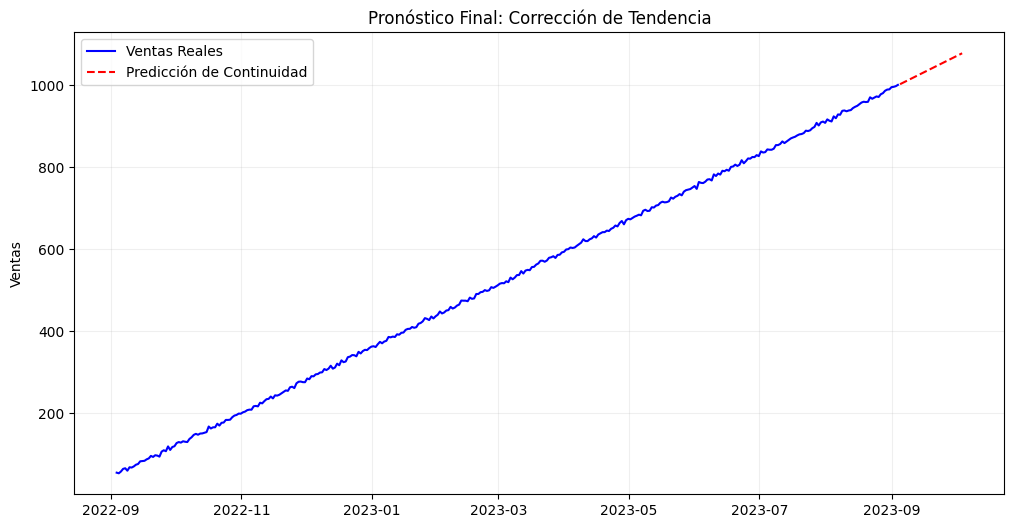

In [14]:
import pandas as pd
import requests
import io
import urllib3
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# 1. Carga limpia de datos
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
url = "https://breathecode.herokuapp.com/asset/internal-link?id=2546&path=sales.csv"
response = requests.get(url, verify=False)
df = pd.read_csv(io.StringIO(response.text))

# 2. Preparación sin remuestreo (usamos los datos como están)
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")
ts = df.set_index("date")["sales"]

# 3. Modelo enfocado 100% en la Tendencia
# Usamos 'stepwise=False' para que busque mejor y 'd=1' para la subida
print("Calculando tendencia real...")
model = auto_arima(ts, 
                   seasonal=False, 
                   d=1, 
                   stepwise=False, 
                   approximation=False)

# 4. Predicción de los próximos 30 puntos (días)
n_days = 30
forecast = model.predict(n_periods=n_days)
forecast_index = pd.date_range(ts.index[-1], periods=n_days + 1, freq=ts.index.freq)[1:]

# 5. Gráfica Comparativa
plt.figure(figsize=(12, 6))
plt.plot(ts.index, ts.values, label="Ventas Reales", color="blue")
plt.plot(forecast_index, forecast, label="Predicción de Continuidad", color="red", linestyle="--")
plt.title("Pronóstico Final: Corrección de Tendencia")
plt.ylabel("Ventas")
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()